### Arnie Larson

Notes, exploration of data coming from the IRIS data portal

Stations
- Station, Latitude,  Longitude,  elevation
- H11N1, 19.7136, 166.8911, -731
- H11N2, 19.7308, 166.9977, -732
- H11N3, 19.7172, 166.9100, -729
- H11S1, 18.5083, 166.7002, -750
- H11S2, 18.4908, 166.7050, -742
- H11S3, 18.4957, 166.6865, -726


#### Tests

There was an earthquake in Turkey on February 6, 2023 at 01:17 UTC

In Tonga there was an underwater volcano on December 15, 2021

The ATOC project tests are in the process of restarting [http://marasondo.org/] with tests that were completed on 
- 12/01/2022 at 11:00:00; 23:00:00
- 12/02/2022 at 11:00:00; 23:00:00
- 12/03/2022 at 11:00:00; 23:00:00
- 12/04/2022 at 11:00:00; 23:00:00




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy.fft import fft, fftfreq
import scipy.signal as signal
import scipy.io as io
import os

In [541]:
os.listdir("rex/msequence")
import rex.msequence.pulse_compressor3 as pc

In [84]:
# Plot both the pressure and PSD for the t, P inputs, defaults to Hahn window
# Also plot the spectrogram
def plot4(t,P,w=True, fs=250, nperseg=256, title='PSD'):
    # could validated thate dimes are same
    print("max/min of P {} / {}".format(P.max(), P.min()))
    fig, (ax,ax1,ax2, ax3) = plt.subplots(4,1,figsize=(12,9))

    ax.plot(t,P)
    ax.set_title("Pressure ($\mu Pa$)"); ax.set_xlabel("Time [s]")# ; ax.set_ylabel("Pressure [$\mu Pa$]")
    N1=P.shape[0]; DT = t[1] - t[0];  # time delta between points
    if w:
        w1=(1/N1)*np.power(np.cos(np.pi*t/N1),2)
        P=w1*P
    F1=np.abs(fft(P))/N1                # normalized fourier spectrum [Pa / Hz]  (with all frequencies)
    f1=fftfreq(N1, DT)[:N1//2] 
    PSD=2*F1[0:N1//2]*F1[0:N1//2]      # should remove half of the DC energy
    PSD[0]=PSD[0]/2
    PSD_db = 10*np.log10(PSD/(1e-6)**2)
    
    
    ax1.plot(f1[0:], PSD_db)
    ax1.grid('true')
    ax1.set_xlabel("Frequency ")# , ax1.set_ylabel("PSD [dB re $(\mu Pa)^2/Hz$]")
    ax1.set_title(title)
    
    fx, tx, Sx = signal.spectrogram(P, fs, nperseg=nperseg*4)#, nfft=256*8)
    ax2.pcolormesh(tx, fx[:250], Sx[:250,:], shading="auto", norm=colors.LogNorm(vmin=Sx.min(), vmax=Sx.max()))
    ax2.set_xlabel("Time [s]"), ax2.set_ylabel("Frequency ")
    ax2.set_title("Spectrogram of signal")

    fx, tx, Sx = signal.spectrogram(P[3000*250:3300*250], fs, nperseg=nperseg)#, nfft=256*8)
    ax3.pcolormesh(tx, fx[:60], Sx[:60,:], shading="auto", norm=colors.LogNorm(vmin=Sx.min(), vmax=Sx.max()))
    ax3.set_xlabel("Time [s]"), ax2.set_ylabel("Frequency ")
    ax3.set_title("[Zoomed in to 3000s] Spectrogram of signal")

    fig.tight_layout()
    #plt.savefig("visual.pdf")
    plt.show()



# Plot both the pressure and PSD for the t, P inputs, defaults to Hahn window
def plot3(t,P,w=True, fs=250, nperseg=1024*2, title='PSD'):
    # could validated thate dimes are same
    print("max/min of P {} / {}".format(P.max(), P.min()))
    fig, (ax,ax1,ax2) = plt.subplots(3,1,figsize=(12,8))

    ax.plot(t,P)
    ax.set_title("Pressure ($\mu Pa$)"); ax.set_xlabel("Time [s]")# ; ax.set_ylabel("Pressure [$\mu Pa$]")
    N1=P.shape[0]; DT = t[1] - t[0];  # time delta between points
    if w:
        w1=(1/N1)*np.power(np.cos(np.pi*t/N1),2)
        P=w1*P
    F1=np.abs(fft(P))/N1                # normalized fourier spectrum [Pa / Hz]  (with all frequencies)
    f1=fftfreq(N1, DT)[:N1//2] 
    PSD=2*F1[0:N1//2]*F1[0:N1//2]      # should remove half of the DC energy
    PSD[0]=PSD[0]/2
    PSD_db = 10*np.log10(PSD/(1e-6)**2)
    
    
    ax1.plot(f1[0:], PSD_db)
    ax1.grid('true')
    ax1.set_xlabel("Frequency ")# , ax1.set_ylabel("PSD [dB re $(\mu Pa)^2/Hz$]")
    ax1.set_title(title)
    
    fx, tx, Sx = signal.spectrogram(P, fs, nperseg=nperseg)#, nfft=256*8)
    ax2.pcolormesh(tx, fx[:500], Sx[:500,:], shading="auto", norm=colors.LogNorm(vmin=Sx.min(), vmax=Sx.max()))
    ax2.set_xlabel("Time [s]"), ax2.set_ylabel("Frequency ")
    ax2.set_title("Spectrogram of signal")
    
    fig.tight_layout()
    plt.show()
    
# Plot both the pressure and PSD for the t, P inputs, defaults to Hahn window
def plot2(t,P,w=True, title='PSD'):
    # could validated thate dimes are same
    print("max/min of P {} / {}".format(P.max(), P.min()))
    fig, (ax,ax1) = plt.subplots(2,1,figsize=(12,6))

    ax.plot(t,P)
    ax.set_title("Pressure ($\mu Pa$)"); ax.set_xlabel("Time [s]")# ; ax.set_ylabel("Pressure [$\mu Pa$]")
    N1=P.shape[0]; DT = t[1] - t[0];  # time delta between points
    if w:
        w1=(1/N1)*np.power(np.cos(np.pi*t/N1),2)
        P=w1*P
    F1=np.abs(fft(P))/N1                # normalized fourier spectrum [Pa / Hz]  (with all frequencies)
    f1=fftfreq(N1, DT)[:N1//2] 
    PSD=2*F1[0:N1//2]*F1[0:N1//2]      # should remove half of the DC energy
    PSD[0]=PSD[0]/2
    PSD_db = 10*np.log10(PSD/(1e-6)**2)
    
    
    ax1.plot(f1[0:], PSD_db)
    ax1.grid('true')
    ax1.set_xlabel("Frequency ")# , ax1.set_ylabel("PSD [dB re $(\mu Pa)^2/Hz$]")
    ax1.set_title(title)
    fig.tight_layout()
    plt.show()
    
def plot_spec(P, fs=250, np=256):
    fx, tx, Sx = signal.spectrogram(P, fs, nperseg=np)#, nfft=256*8)
    plt.pcolormesh(tx, fx[:250], Sx[:250,:], shading="auto", norm=colors.LogNorm(vmin=Sx.min(), vmax=Sx.max()))
    plt.xlabel("Time [s]"), plt.ylabel("Frequency ")
    plt.title("Spectrogram of signal")
    plt.show()

def plot_psd(t,P,w=True, title='PSD'):
    # could validated thate dimes are same

    N1=P.shape[0]; DT = t1[1] - t1[0];  # time delta between points
    if w:
        w1=1/N1*np.power(np.cos(np.pi*t/N1),2)
        P=w1*P
    F1=np.abs(fft(P))/N1                # normalized fourier spectrum [Pa / Hz]  (with all frequencies)
    f1=fftfreq(N1, DT)[:N1//2] 
    PSD=2*F1[1:N1//2]*F1[1:N1//2]      # should remove half of the DC energy
    PSD[0]=PSD[0]/2
    PSD_db = 10*np.log10(PSD/(1e-6)**2)
    fig, ax = plt.subplots(figsize=(8,5));
    ax.plot(f1[1:], PSD_db)
    ax.grid('true'); ax.legend()
    ax.set_xlabel("Frequency "), ax.set_ylabel("PSD [dB re $(\mu Pa)^2/Hz$]")
    ax.set_title(title)
    plt.show()

In [3]:
# generate the m sequences, 
f1 = open(os.path.join(os.getcwd(),"rex/msequence/s1333.txt"))
f2 = open(os.path.join(os.getcwd(),"rex/msequence/s3471.txt"))
l1 = f1.readline().rstrip(",").split(",")
l2 = f2.readline().rstrip(",").split(",")
f1.close(); f2.close()
s1333 = [int(x) if x == '1' else -1 for x in l1]
s3471 = [int(x) if x == '1' else -1  for x in l2]
print(len(s3471))
print(s3471[:20])
print(len(s1333))
print(s1333[:20])

def make_signal_3471(Q, fc, fs, phi=0.0):
    #fc=75;   fs=2400;   
    Ts=Q/fc
    t=np.linspace(0, len(s3471)*Ts, int(fs*len(s3471)*Ts + 1))
    # laboriously loop through carrier, and phase shift sequence
    p = np.sin(2*np.pi*fc*t + phi)
    for i in range(t.shape[0]):
        if t[i] > 0:
            sidx = int(np.floor(t[i]/Ts))     # Get the index into the m sequence
            if sidx < len(s3471):
                p[i] = p[i]*s3471[sidx]
    return t, p

def make_signal_1333(Q, fc, fs, phi=0.0):
    #fc=75;   fs=2400;   
    Ts=Q/fc
    t=np.linspace(0, len(s1333)*Ts, int(fs*len(s1333)*Ts + 1))
    # laboriously loop through carrier, and phase shift sequence
    p = np.sin(2*np.pi*fc*t + phi)
    for i in range(t.shape[0]):
        if t[i] > 0:
            sidx = int(np.floor(t[i]/Ts))     # Get the index into the m sequence
            if sidx < len(s1333):
                p[i] = p[i]*s1333[sidx]
    return t, p

1023
[-1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1]
511
[-1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1]


In [4]:

def loadn(station, files):
    l = []
    for fname in files:
        print("Loading fname: {}".format(fname))
        l.append(load(station, fname))
    return np.concatenate(l)

def ls(station):
    p="/Users/arnie/Documents/EE/Code/IRIS/data/IRIS/IM/"+station
    return os.listdir(p)
        
def load(station, fname):
    filepath="/Users/arnie/Documents/EE/Code/IRIS/data/IRIS/IM/"+station+"/"+fname
    i=0
    p=[]
    for line in open(filepath).readlines():
        if i < 2:
            print("{}".format(line))
            i+=1
        else:
            try:
                p.append(np.float32(line))
            except:
                print("Error processing: {}".format(line))
                
    return np.array(p)

#### Data

Procedure to look at real data
1. list the directory of interest
2. Load 1 or more files of interest
3. Plot full time series and a PSD

In [106]:
#ls("H11S1")
files = ["2023-02-05 11:26:20.003.txt", "2023-02-05 13:37:50.003.txt", "2023-02-05 15:49:30.003.txt"]
P=loadn("H11S2", files)
P.shape

Loading fname: 2023-02-05 11:26:20.003.txt
#Network	Station	Starttime	FS	Units

Sensitivity#IM		H11S2	2023-02-05T00:00:00	250.000000	uPa	1870.990000

Loading fname: 2023-02-05 13:37:50.003.txt
#Network	Station	Starttime	FS	Units

Sensitivity#IM		H11S2	2023-02-05T00:00:00	250.000000	uPa	1870.990000

Loading fname: 2023-02-05 15:49:30.003.txt
#Network	Station	Starttime	FS	Units

Sensitivity#IM		H11S2	2023-02-05T00:00:00	250.000000	uPa	1870.990000



(4105000,)

In [5]:
t3471,p3471 = make_signal_3471(2,75,250)
plt.plot(t[:200],p3471[:200])

NameError: name 't' is not defined

In [109]:
P=load("H11N3", "2023-02-05 15:39:00.003.txt")
P.shape

#Network	Station	Starttime	FS	Units

Sensitivity#IM		H11N3	2023-02-05T16:00:00	250.000000	uPa	1848.610000



(1482500,)

In [110]:
P = P/1848.86*1e6
P=P-P.mean()
N=P.shape[0]
FS=250.0
DT=1/FS
t = np.linspace(0,N/FS,N)

In [79]:
# filter the signal, drop out low frequencies:
sos = signal.butter(6, 20, 'hp', fs=250, output='sos')
Pf = signal.sosfilt(sos, P)

max/min of P 1185396.0 / -1248536.0


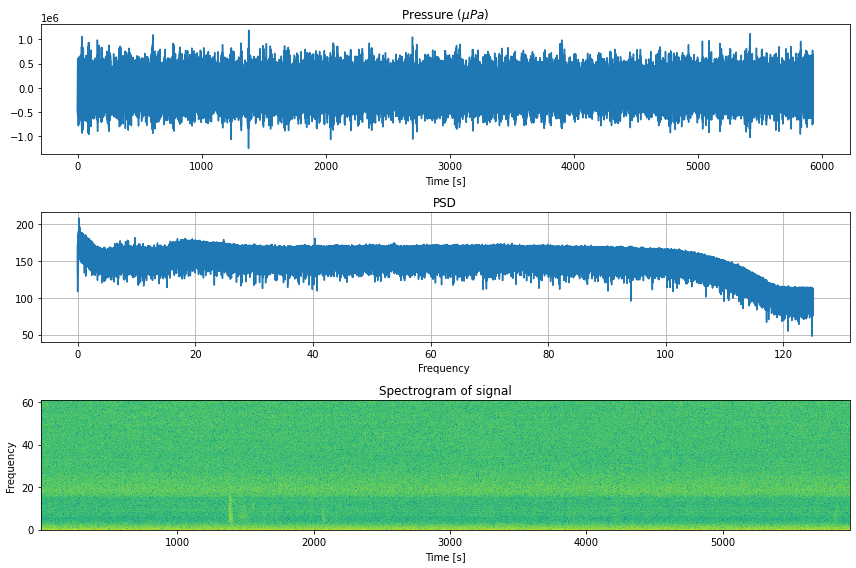

In [111]:
# Look at the full pressure signal (low pass) and PSD (non normalized, low pass and windowed)
plot3(t, P, w=False)

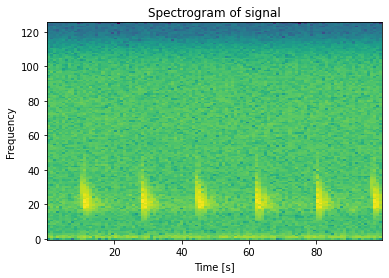

In [704]:
plot_spec(P[1200*250:1300*250])

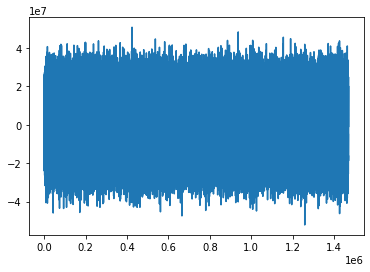

In [70]:
# look at correlation of p3471 with signal
r = np.flip(p3471)
a = signal.correlate(Pf[2000*250:], p3471, mode='same', method='direct')/250
#a = signal.correlate(Pf, r, mode='same', method='direct')/250
plt.plot(a)

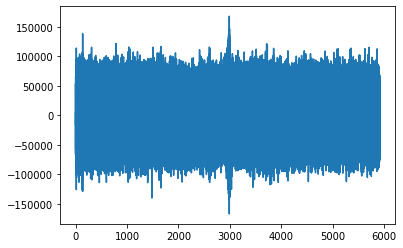

In [640]:
plt.plot(t,a)

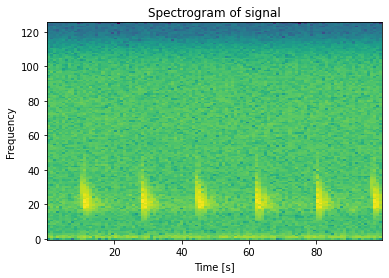

In [694]:

plot_spec(P[1200*250:1300*250])

max/min of P 3485970.5342760705 / -3728143.6480301167


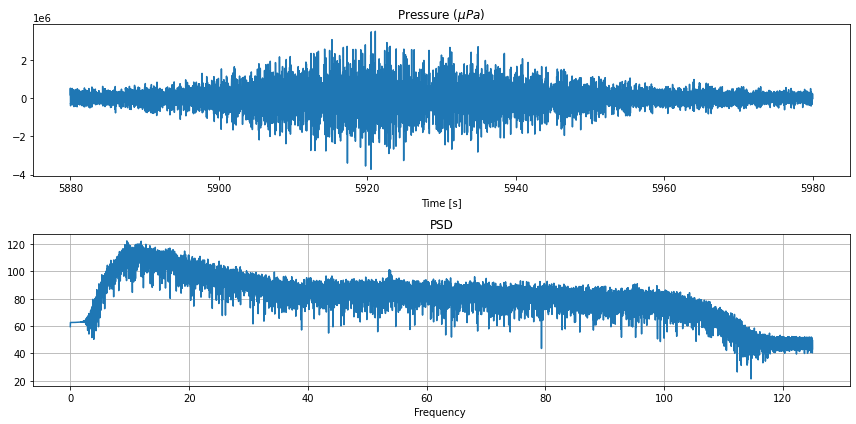

In [593]:
# plot zoomed in
t0=5880
dt=100
plot2(t[t0*250:(t0+dt)*250],Pf[t0*250:(t0+dt)*250])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


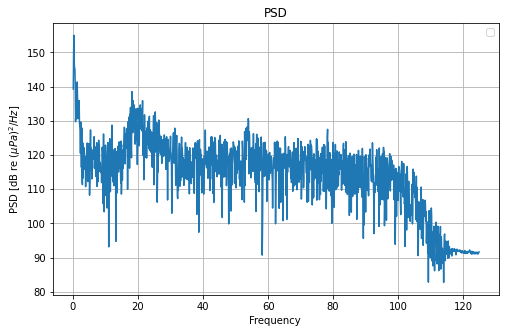

In [509]:
plot_psd(t[t0*250:(t0+dt)*250],P[t0*250:(t0+dt)*250])

In [95]:
P=load("H11N2", "2023-02-05 17:17:50.003.txt")
P[0]

#Network	Station	Starttime	FS	Units

Sensitivity#IM		H11N2	2023-02-05T16:00:00	250.000000	uPa	1839.030000



123833.0

In [96]:
P = P/1839.03*1e6
P = P - P.mean()

In [97]:
N1=P.shape[0]
FS=250.0
DT=1/FS
t1 = np.linspace(0,N1/FS,N1)
t1[:10]

array([0.        , 0.004     , 0.00800001, 0.01200001, 0.01600001,
       0.02000002, 0.02400002, 0.02800002, 0.03200003, 0.03600003])

ValueError: x and y must have same first dimension, but have shapes (1180000,) and (1152500,)

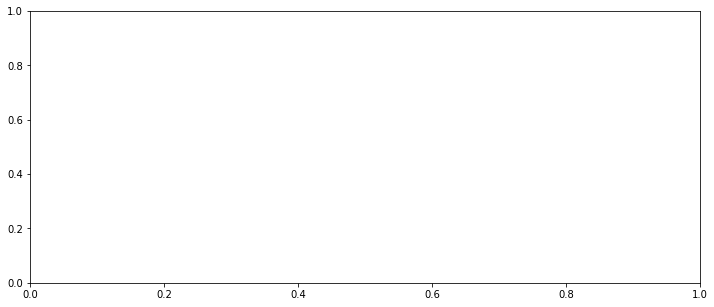

In [242]:
fig, ax = plt.subplots(figsize=(12,5));
ax.plot(t1,P)

In [137]:
a = np.arange(5)
b = np.arange(6)
l = [a,b]
c = np.concatenate(l)

In [138]:
c

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5])